In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("Placement.csv")

In [3]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
dataset['status'].value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

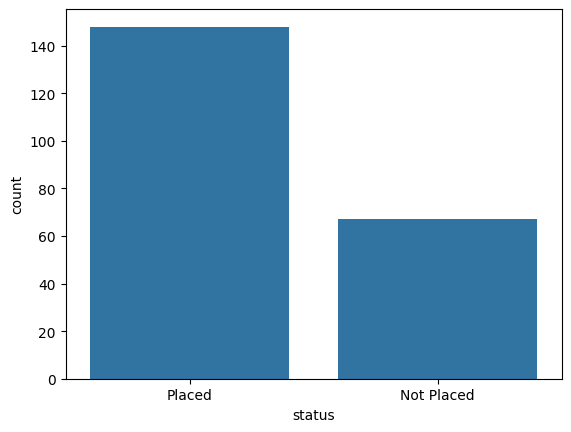

In [5]:
# Visualize the distribution of 'status'
sns.countplot(x='status', data=dataset)
plt.show()

In [6]:
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [7]:
dataset["salary"].fillna(0,inplace=True)

C:\Users\Hemalatha\AppData\Local\Temp\ipykernel_13572\2080798296.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["salary"].fillna(0,inplace=True)


In [8]:
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [9]:
from Univariate import Univariate

In [10]:
quan,qual=Univariate.quanQual(dataset)

In [11]:
quan

['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [12]:
qual

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

In [13]:
dataset["salary"].fillna(0,inplace=True)

C:\Users\Hemalatha\AppData\Local\Temp\ipykernel_13572\2080798296.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["salary"].fillna(0,inplace=True)


In [14]:
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [53]:
predataset=pd.get_dummies(dataset,drop_first=True)
predataset=predataset.astype(int)
predataset.to_csv('Preplacement.csv', index=False)

In [15]:
#predataset=pd.read_csv("Preplacement.csv")

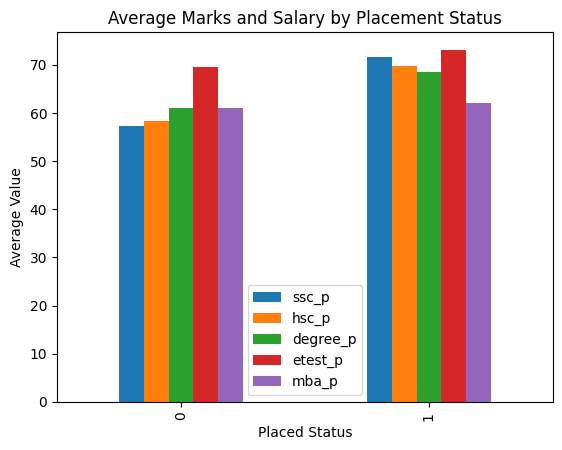

In [54]:
df_grouped = predataset.groupby('status_Placed').mean().reset_index()
df_grouped.plot(kind='bar', x='status_Placed', y=['ssc_p','hsc_p','degree_p','etest_p','mba_p'])
plt.title('Average Marks and Salary by Placement Status')
plt.xlabel('Placed Status')
plt.ylabel('Average Value')
plt.show()

In [56]:
correlation_matrix = predataset.corr()
print(correlation_matrix['status_Placed'])

sl_no                   -0.026859
ssc_p                    0.610116
hsc_p                    0.491233
degree_p                 0.478176
etest_p                  0.126954
mba_p                    0.076849
salary                   0.865774
gender_M                 0.090670
ssc_b_Others             0.037297
hsc_b_Others             0.016945
hsc_s_Commerce           0.024414
hsc_s_Science            0.007279
degree_t_Others         -0.117232
degree_t_Sci&Tech        0.008688
workex_Yes               0.276060
specialisation_Mkt&HR   -0.250655
status_Placed            1.000000
Name: status_Placed, dtype: float64


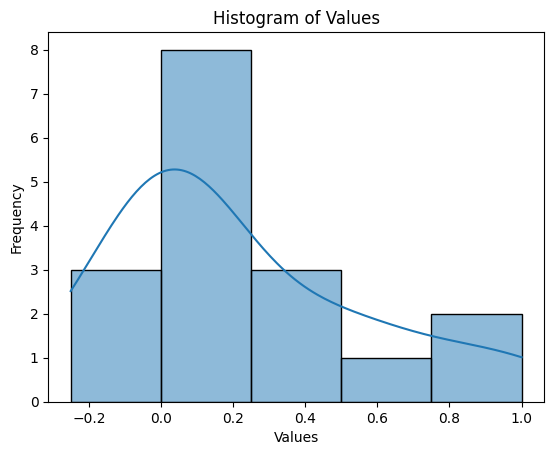

In [57]:
# Plot the histogram
sns.histplot(correlation_matrix['status_Placed'], bins=5, kde=True)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.show()

In [17]:
dataset.corr(numeric_only=True)

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.002543
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.002543,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


In [18]:
# Group by specialization and calculate the average salary
specialization_salary = dataset.groupby('specialisation')['salary'].mean()

# Find the specialization with the minimum average salary
min_salary_specialization = specialization_salary.idxmin()
min_salary_value = specialization_salary.min()

print(f'The specialization with the minimum average salary is {min_salary_specialization} with an average salary of {min_salary_value:.2f}')

The specialization with the minimum average salary is Mkt&HR with an average salary of 150842.11


In [19]:
dataset['salary'].max()

940000.0

In [20]:
high_salary_df = dataset[dataset['salary'] > 500000]

In [21]:
high_salary_df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
119,120,M,60.8,Central,68.40,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
150,151,M,71.0,Central,58.66,Central,Science,58.0,Sci&Tech,Yes,56.00,Mkt&Fin,61.30,Placed,690000.0
177,178,F,73.0,Central,97.00,Others,Commerce,79.0,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0


In [22]:
count_high_salary = high_salary_df.shape[0]

In [23]:
print(f'The number of individuals with salaries above 500,000 is {count_high_salary}')

The number of individuals with salaries above 500,000 is 3


In [24]:
from scipy.stats import f_oneway

# Perform ANOVA
f_statistic, p_value = f_oneway(dataset['etest_p'],  dataset['mba_p'])

# Print the results
print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

# Decision based on significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means of etest_p and mba_p.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means of etest_p and mba_p.")


F-statistic: 98.64487057324706
P-value: 4.672547689133573e-21
Reject the null hypothesis: There is a significant difference between the means of etest_p and mba_p.


Independent Sample - Unpaired T Test

Diferrent Group(Sci &Tech, Mkt & HR)in degree_t and specialisation but same condition(salary)

In [25]:
from scipy.stats import ttest_ind

sci_tech = dataset[dataset['degree_t']=='Sci&Tech']['salary']
mkt_hr = dataset[dataset['specialisation']=='Mkt&HR']['salary']

statistic,pvalue=ttest_ind(sci_tech, mkt_hr)

# Print the results
print(f'F-statistic: {statistic}')
print(f'P-value: {pvalue}')

# Decision based on significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means of Sci&Tech and Mkt&HR.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means of Sci&Tech and Mkt&HR.")


F-statistic: 2.692041243555374
P-value: 0.007897969943471179
Reject the null hypothesis: There is a significant difference between the means of Sci&Tech and Mkt&HR.


In [26]:
salary_data=dataset['salary']

Normal distribution to standard normal distribution

In [27]:
def stdNBgraph(salary_data):
        # Coverted to standard Normal Distribution
    import seaborn as sns
    mean=salary_data.mean()
    std=salary_data.std()

    values=[i for i in salary_data]

    z_score=[((j-mean)/std) for j in values]

    sns.distplot(z_score,kde=True,kde_kws={'color':'blue'},color='green')

    sum(z_score)/len(z_score)
    #z_score.std()


C:\Users\Hemalatha\AppData\Local\Temp\ipykernel_13572\3438654273.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_score,kde=True,kde_kws={'color':'blue'},color='green')


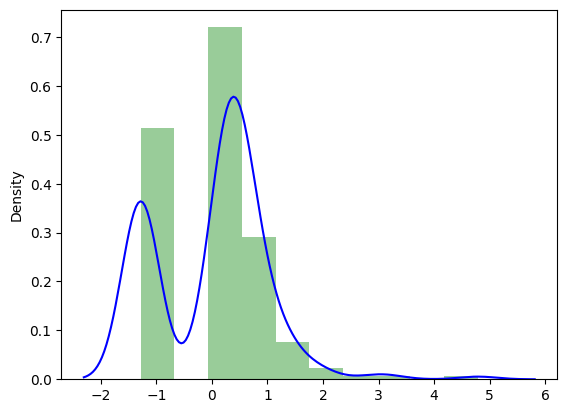

In [28]:
stdNBgraph(salary_data)

In [29]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    # generate a sample
    sample = dataset
    # calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    # define the distribution
    dist = norm(sample_mean, sample_std)
    
    # sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values] 
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob

C:\Users\Hemalatha\AppData\Local\Temp\ipykernel_13572\1350954792.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')


Mean=198702.326, Standard Deviation=154780.927
The area between range(700000,900000):0.0005973310593974868


0.0005973310593974868

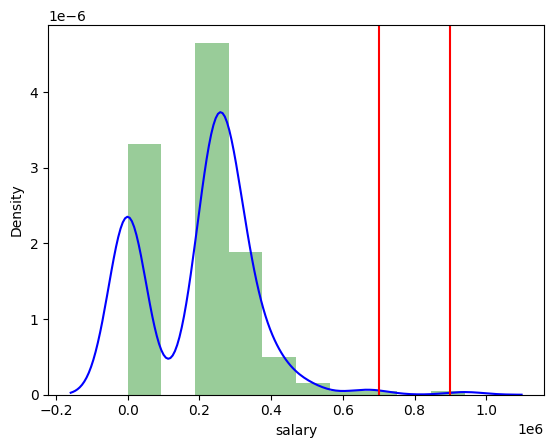

In [30]:
get_pdf_probability(dataset["salary"],700000 ,900000)

Dependant Sample-Paired T_Test

Same Group(degree_t (Sci&Tech) ) but Different Condition(etest_p and mba_p )

In [31]:
from scipy.stats import ttest_rel

degree1 = dataset[dataset['degree_t']=='Sci&Tech']['mba_p']
degree2 = dataset[dataset['degree_t']=='Sci&Tech']['etest_p']

statistic,pvalue=ttest_rel(degree1, degree2)

# Print the results
print(f'F-statistic: {statistic}')
print(f'P-value: {pvalue}')

# Decision based on significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means of Sci&Tech and Mkt&HR.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means of Sci&Tech and Mkt&HR.")


F-statistic: -5.0049844583693615
P-value: 5.517920600505392e-06
Reject the null hypothesis: There is a significant difference between the means of Sci&Tech and Mkt&HR.


             sl_no     ssc_p     hsc_p  degree_p   etest_p     mba_p    salary
sl_no     1.000000 -0.078155 -0.085711 -0.088281  0.063636  0.022327  0.002543
ssc_p    -0.078155  1.000000  0.511472  0.538404  0.261993  0.388478  0.538090
hsc_p    -0.085711  0.511472  1.000000  0.434206  0.245113  0.354823  0.452569
degree_p -0.088281  0.538404  0.434206  1.000000  0.224470  0.402364  0.408371
etest_p   0.063636  0.261993  0.245113  0.224470  1.000000  0.218055  0.186988
mba_p     0.022327  0.388478  0.354823  0.402364  0.218055  1.000000  0.139823
salary    0.002543  0.538090  0.452569  0.408371  0.186988  0.139823  1.000000


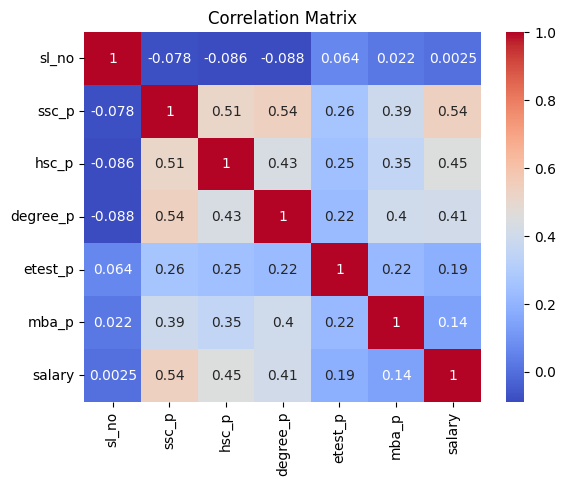

The parameter most highly correlated with salary is 'ssc_p' with a correlation coefficient of 0.54.


In [32]:
# Calculate the correlation matrix
correlation_matrix = dataset.corr(numeric_only=True)

# Print the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Find the parameter with the highest correlation with salary
correlation_with_salary = correlation_matrix['salary'].drop('salary')
most_correlated_parameter = correlation_with_salary.idxmax()
highest_correlation_value = correlation_with_salary.max()

print(f"The parameter most highly correlated with salary is '{most_correlated_parameter}' with a correlation coefficient of {highest_correlation_value:.2f}.")

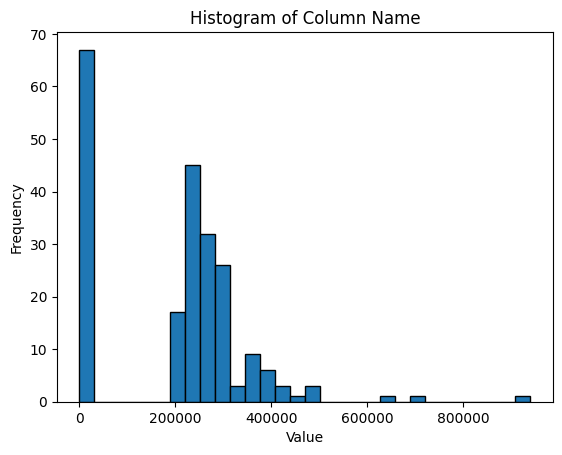

In [33]:
# Plotting histogram
plt.hist(dataset['salary'], bins=30, edgecolor='black')
plt.title('Histogram of Column Name')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

C:\Users\Hemalatha\AppData\Local\Temp\ipykernel_13572\492941456.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['salary'])


<Axes: xlabel='salary', ylabel='Density'>

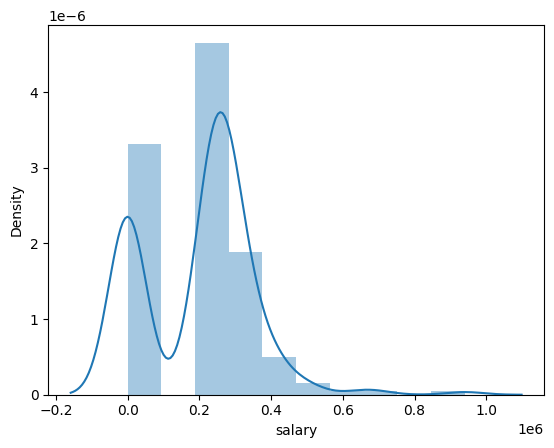

In [47]:
sns.distplot(dataset['salary'])